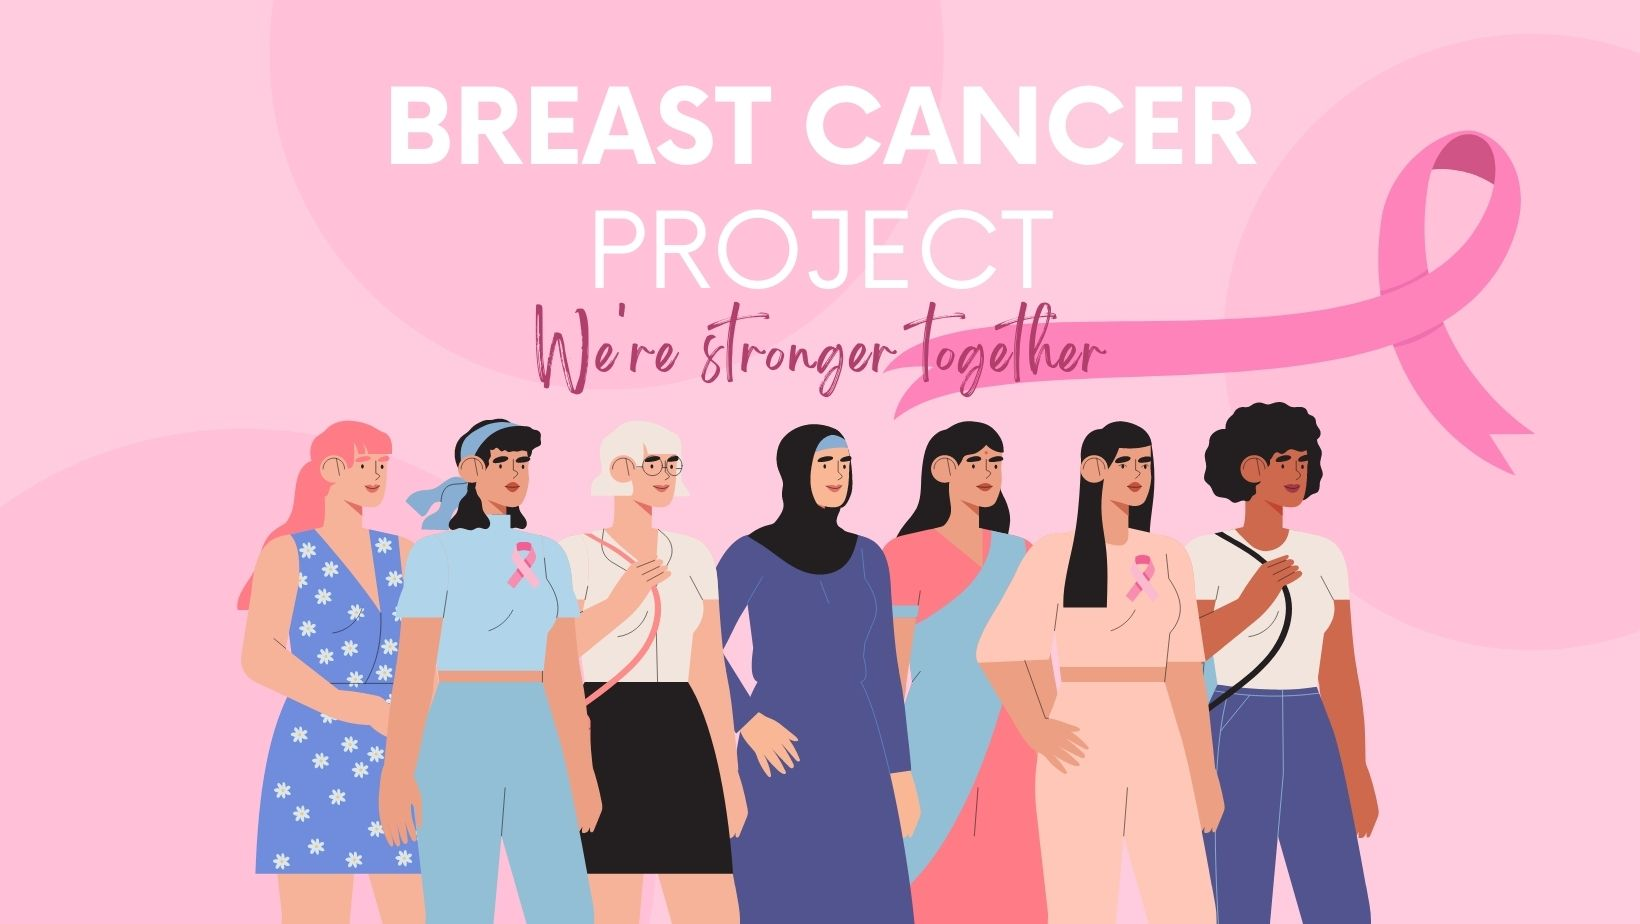

<div style="background-color: pink; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Introduction</h1>
    
</div>

#### Breast cancer is one of the most common cancers diagnosed among women worldwide. It is estimated that one in eight women will develop breast cancer at some point in their lives. Early detection and treatment of breast cancer can significantly improve a patient's chances of survival, making it crucial to develop accurate and efficient diagnostic tools.

#### In this machine learning project, we will be working with the breast cancer dataset, which contains various features of breast mass such as texture, perimeter, area, and more. The goal of this project is to develop a machine learning model that can accurately classify whether a breast mass is malignant or benign.

#### The dataset we will be using consists of 569 samples with 30 features each. It has been widely used in the machine learning community, making it a popular benchmark dataset for classification tasks. The features in the dataset are computed from digitized images of fine needle aspirate (FNA) samples of breast masses.

#### We will be using a variety of machine learning algorithms, including logistic regression, decision trees, random forests, and support vector machines (SVMs), to build and compare models. The accuracy of the models will be evaluated using metrics such as precision, recall, and F1-score.

#### By the end of this project, we hope to have developed a machine learning model that can accurately classify breast masses as malignant or benign. This model can potentially aid medical professionals in the early detection and treatment of breast cancer, ultimately improving patient outcomes

<div style="background-color: pink; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Importing Libraries</h1>
    
</div>

In [1]:
#Basic Analysis & Visualisation libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#Data Preprocessing & Splitig libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Machine Learning Alogorithms libararies
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Machine Learning Model evaluation libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
#Load the dataset
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<div style="background-color: pink; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Basic Data Analysis</h1>
    
</div>

In [4]:
#Checking dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#Checking dataset column and row numbers
df.shape

(569, 32)

In [6]:
#Checking target column's value
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
#Checking statistical analysis of numerical values 
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#Checking missing value
df.isnull().sum().mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: in

In [9]:
#Let's drop the Id column because it is useless for this analysis
df.drop(['id'], axis=1, inplace=True)

In [10]:
#Finally preview the fresh dataset
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<div style="background-color: pink; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Encoding Categorical Data</h1>
    
</div>

In [11]:
le = LabelEncoder()
df.diagnosis = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<div style="background-color: pink; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Exploratory Data Analysis</h1>
    
</div>

In [12]:
#Copying the final dataset first for keeping this untouched. 
data = df.copy()

In [13]:
#Preview the new dataset
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot: >

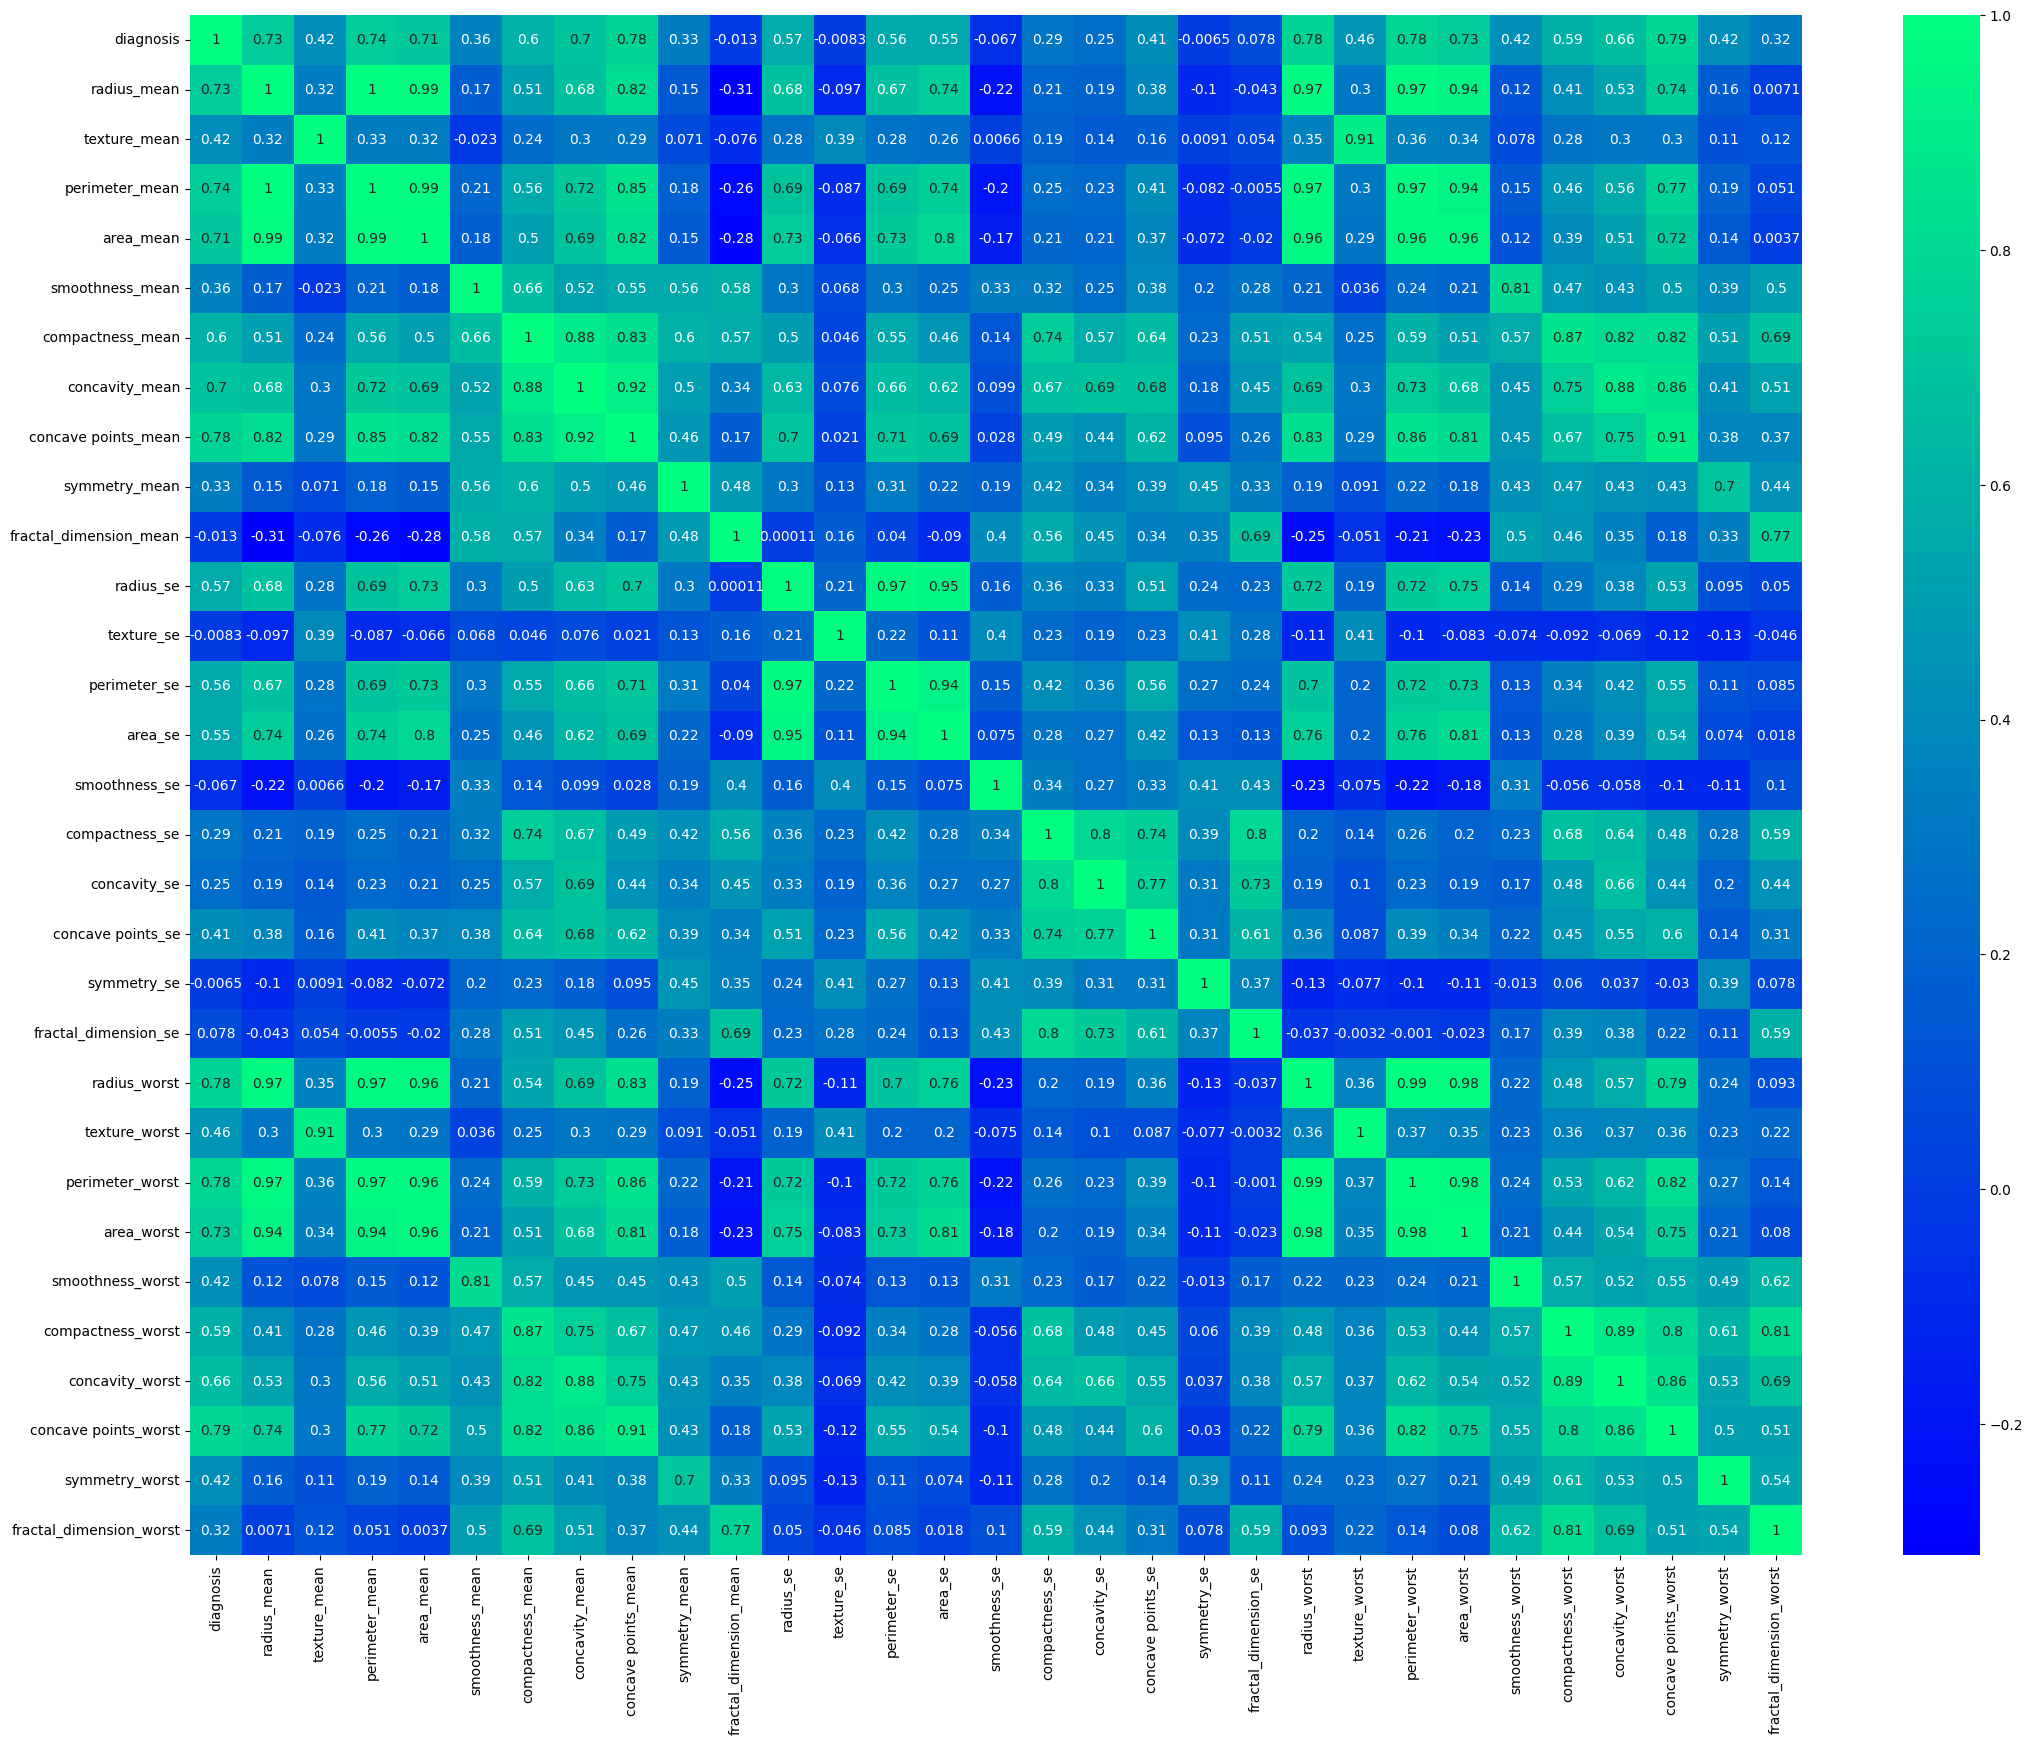

In [14]:
plt.figure(figsize=(26,20))
sns.heatmap(data.corr(), annot=True, cmap="winter")

#### Looks like every features in the dataset are very important for detecting cancer diseases
#### There are two features that we need to focus on

#### 1.Features: mean, area_se, radius_se,...
#### 2.Label data: Diagnosis

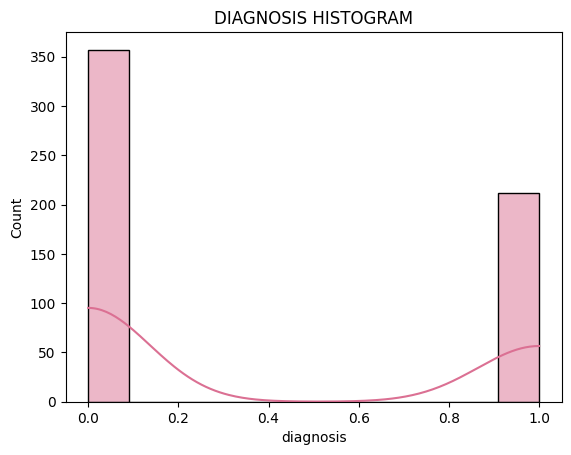

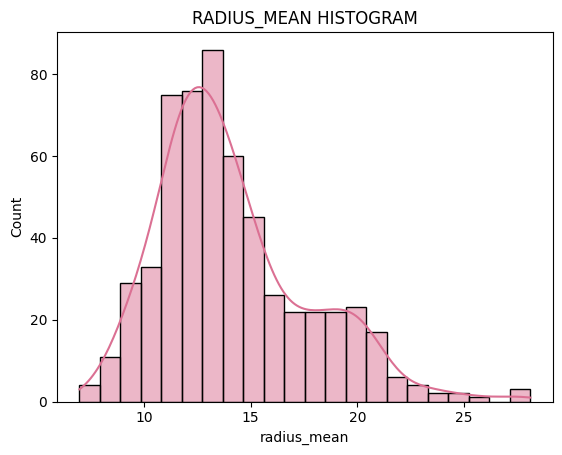

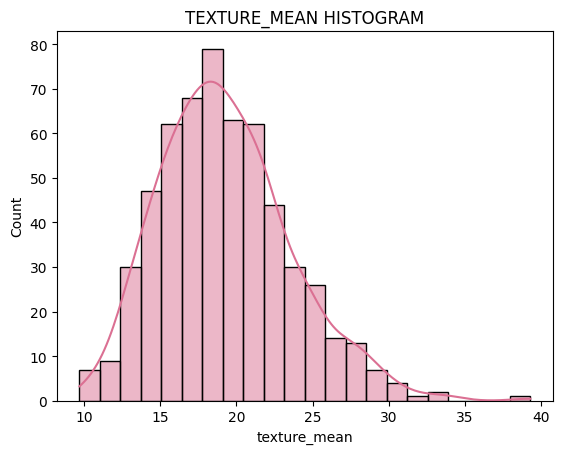

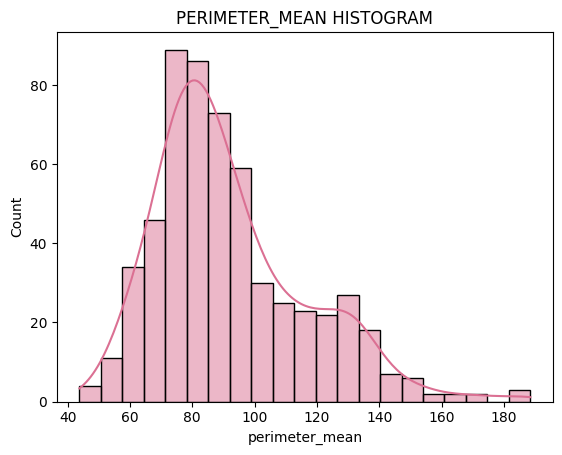

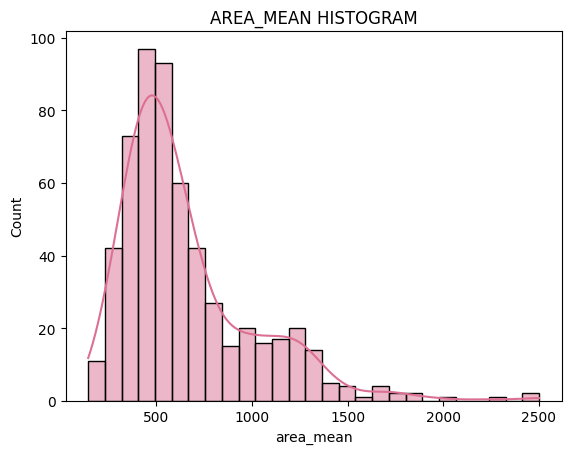

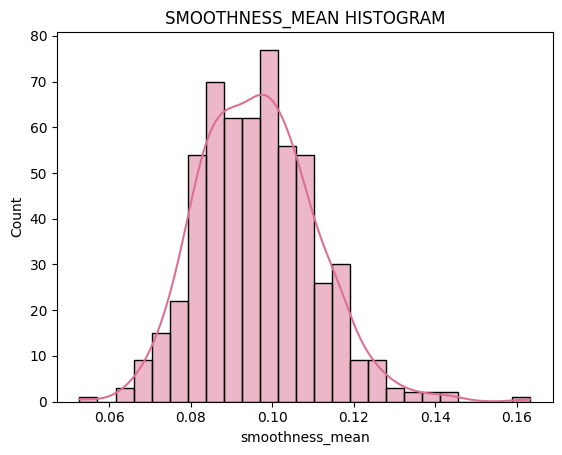

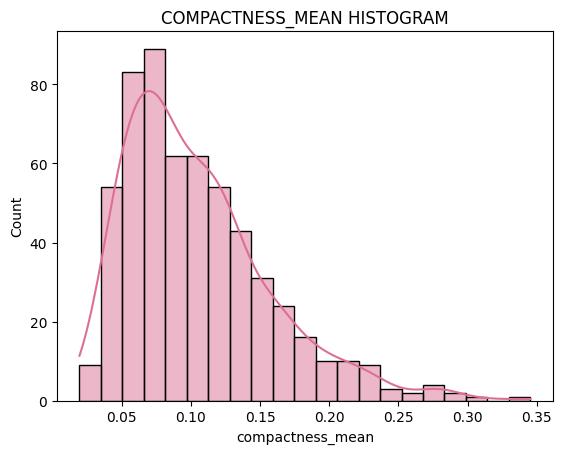

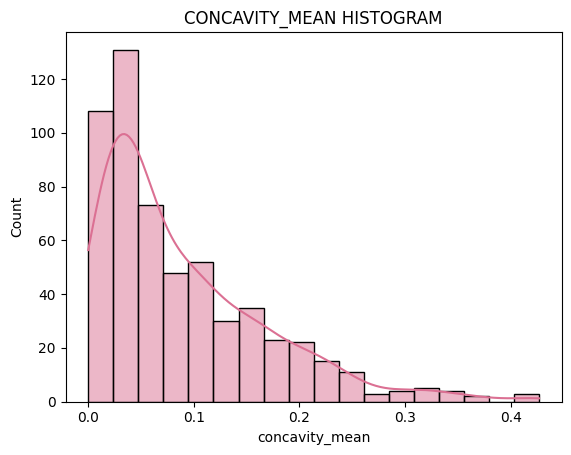

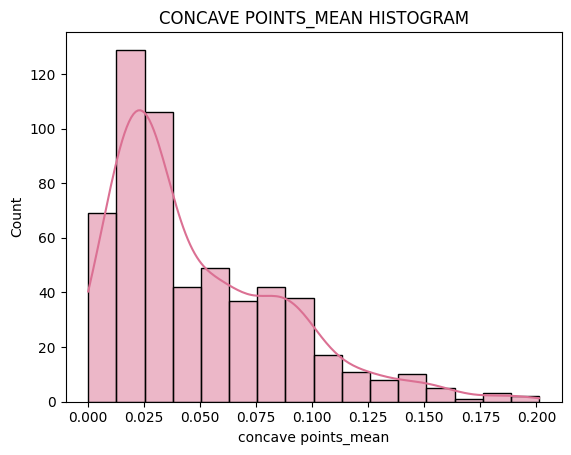

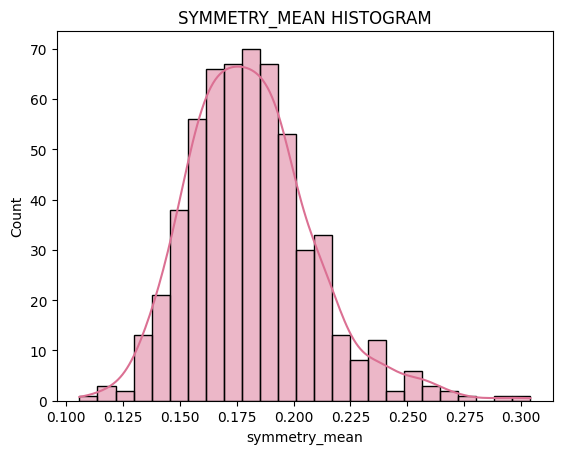

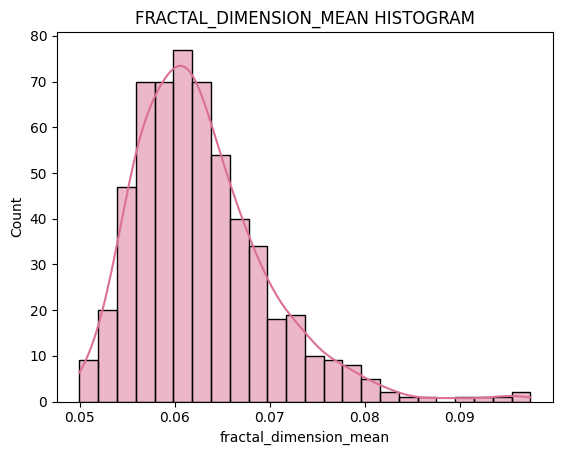

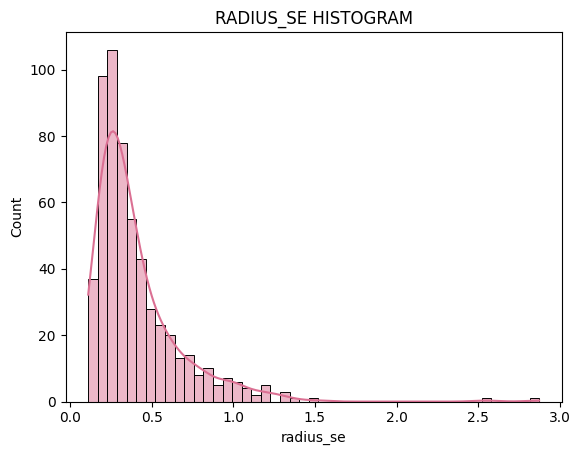

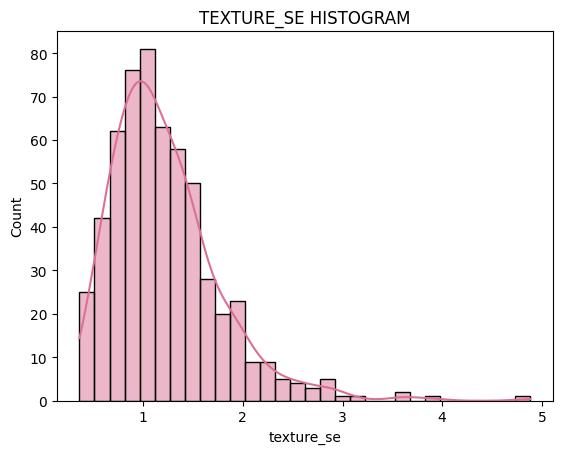

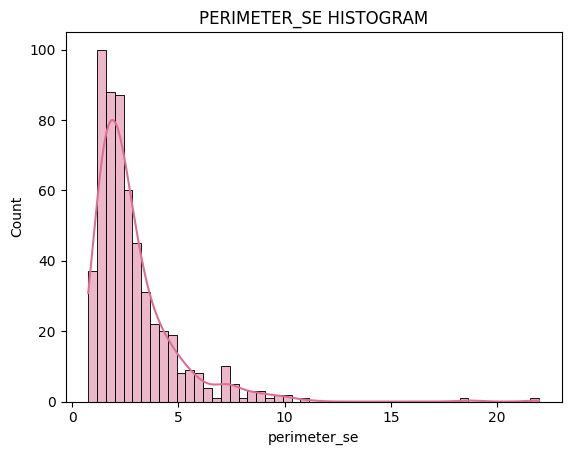

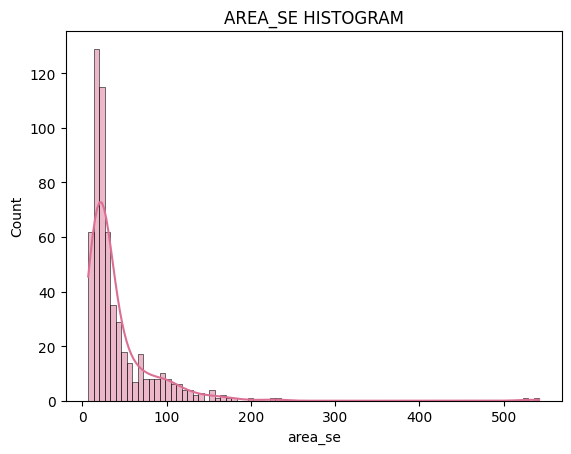

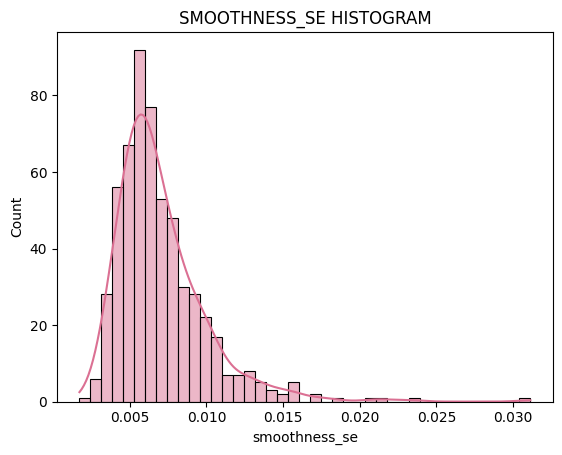

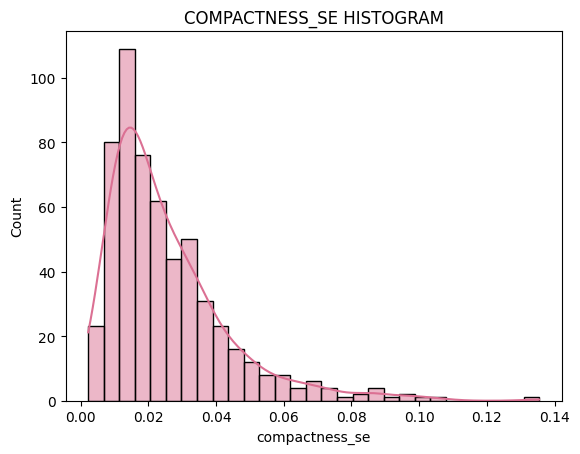

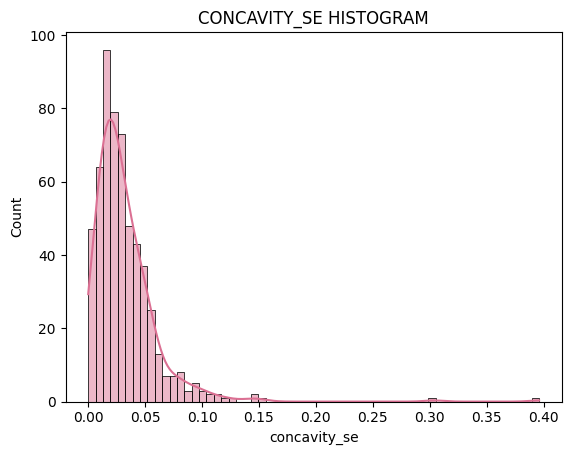

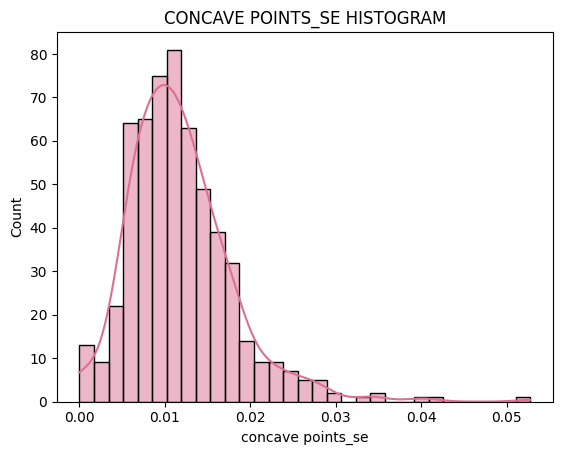

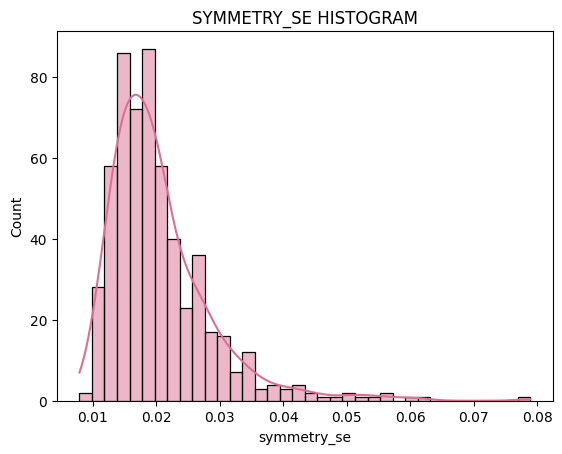

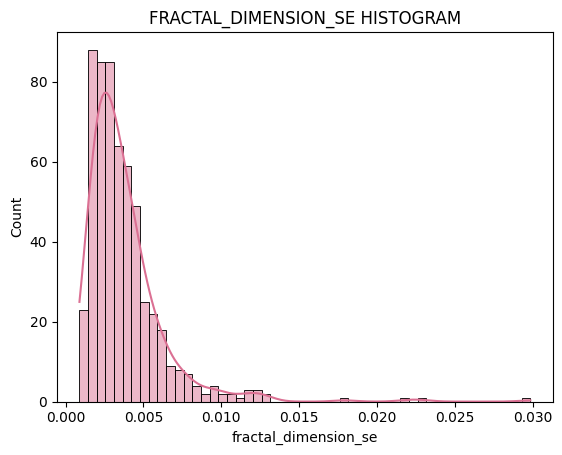

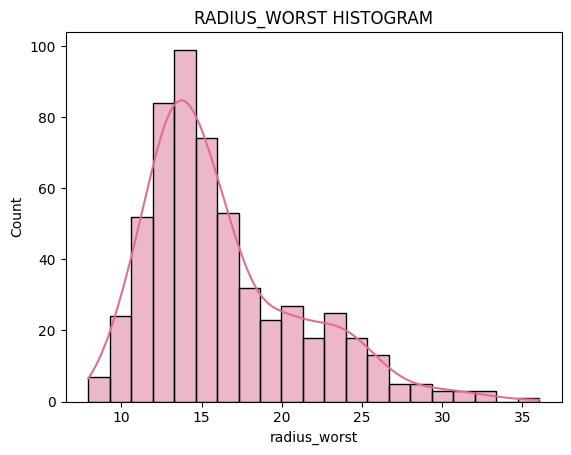

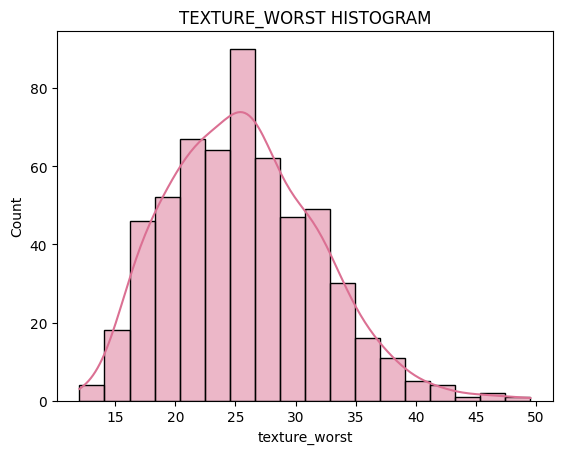

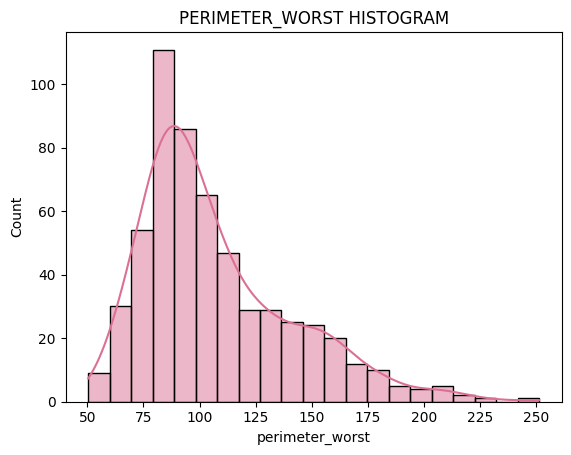

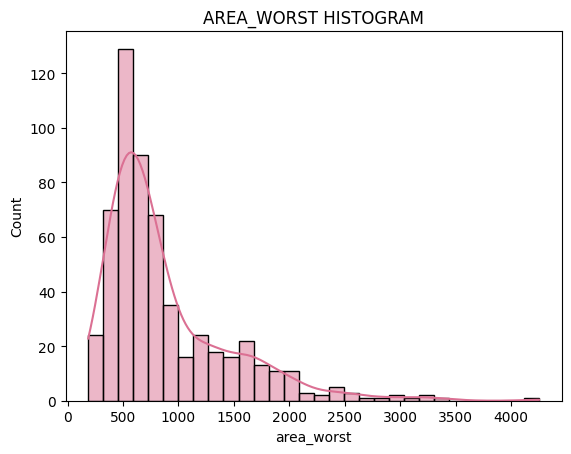

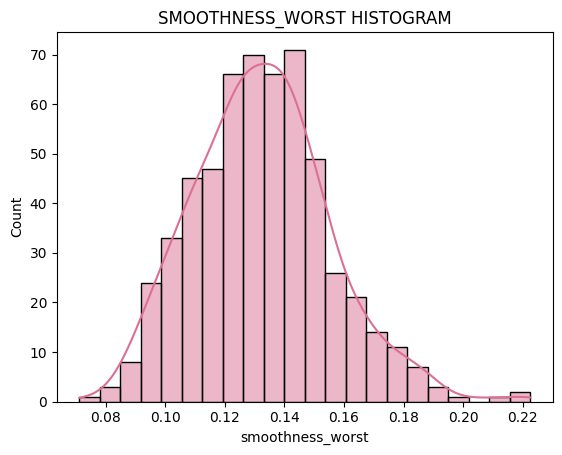

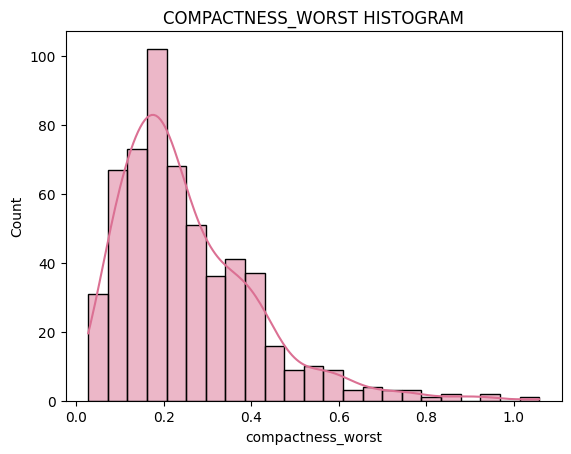

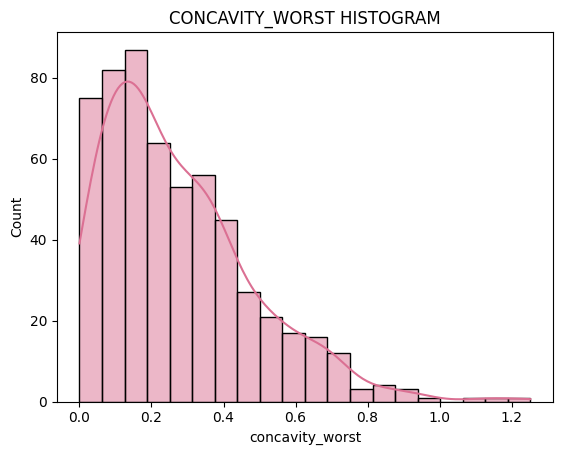

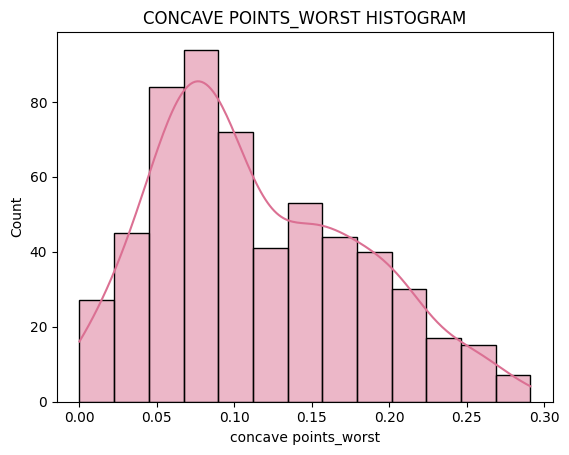

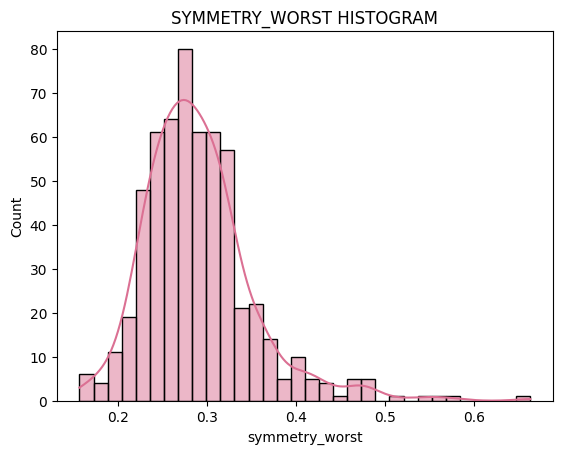

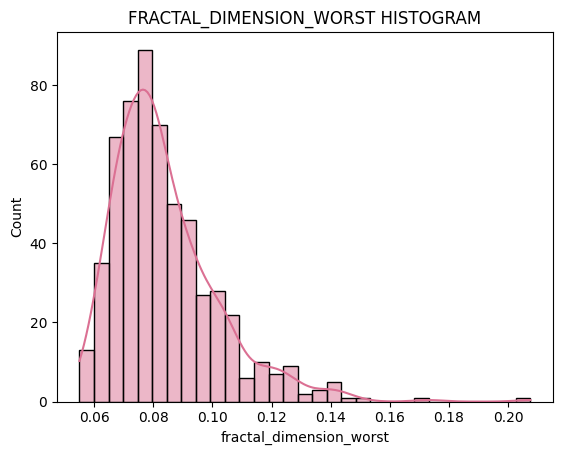

In [15]:
for i in df.columns:
    fig, ax = plt.subplots()
    sns.histplot(data=df, x=i, kde=True, color='palevioletred', ax=ax)
    ax.set(xlabel=i, ylabel='Count', title=i.upper() + ' HISTOGRAM')
    plt.show()


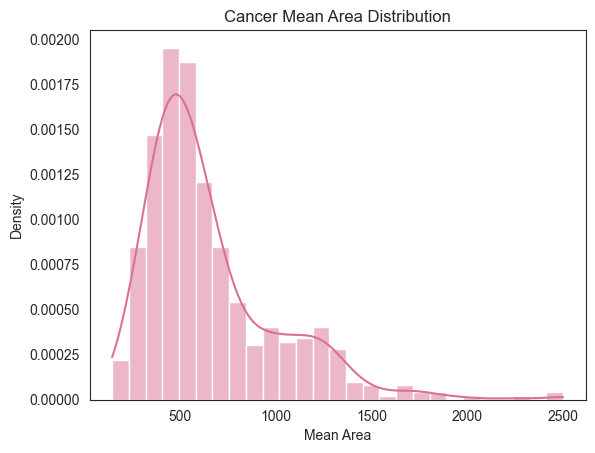

In [16]:
sns.set_style("white")

fig, ax = plt.subplots()
sns.histplot(x="area_mean", data=df, color='palevioletred', ax=ax, kde=True, stat='density')
ax.set(xlabel="Mean Area", ylabel="Density", title="Cancer Mean Area Distribution")
plt.show()


In [17]:
print(df['diagnosis'].unique())

[1 0]


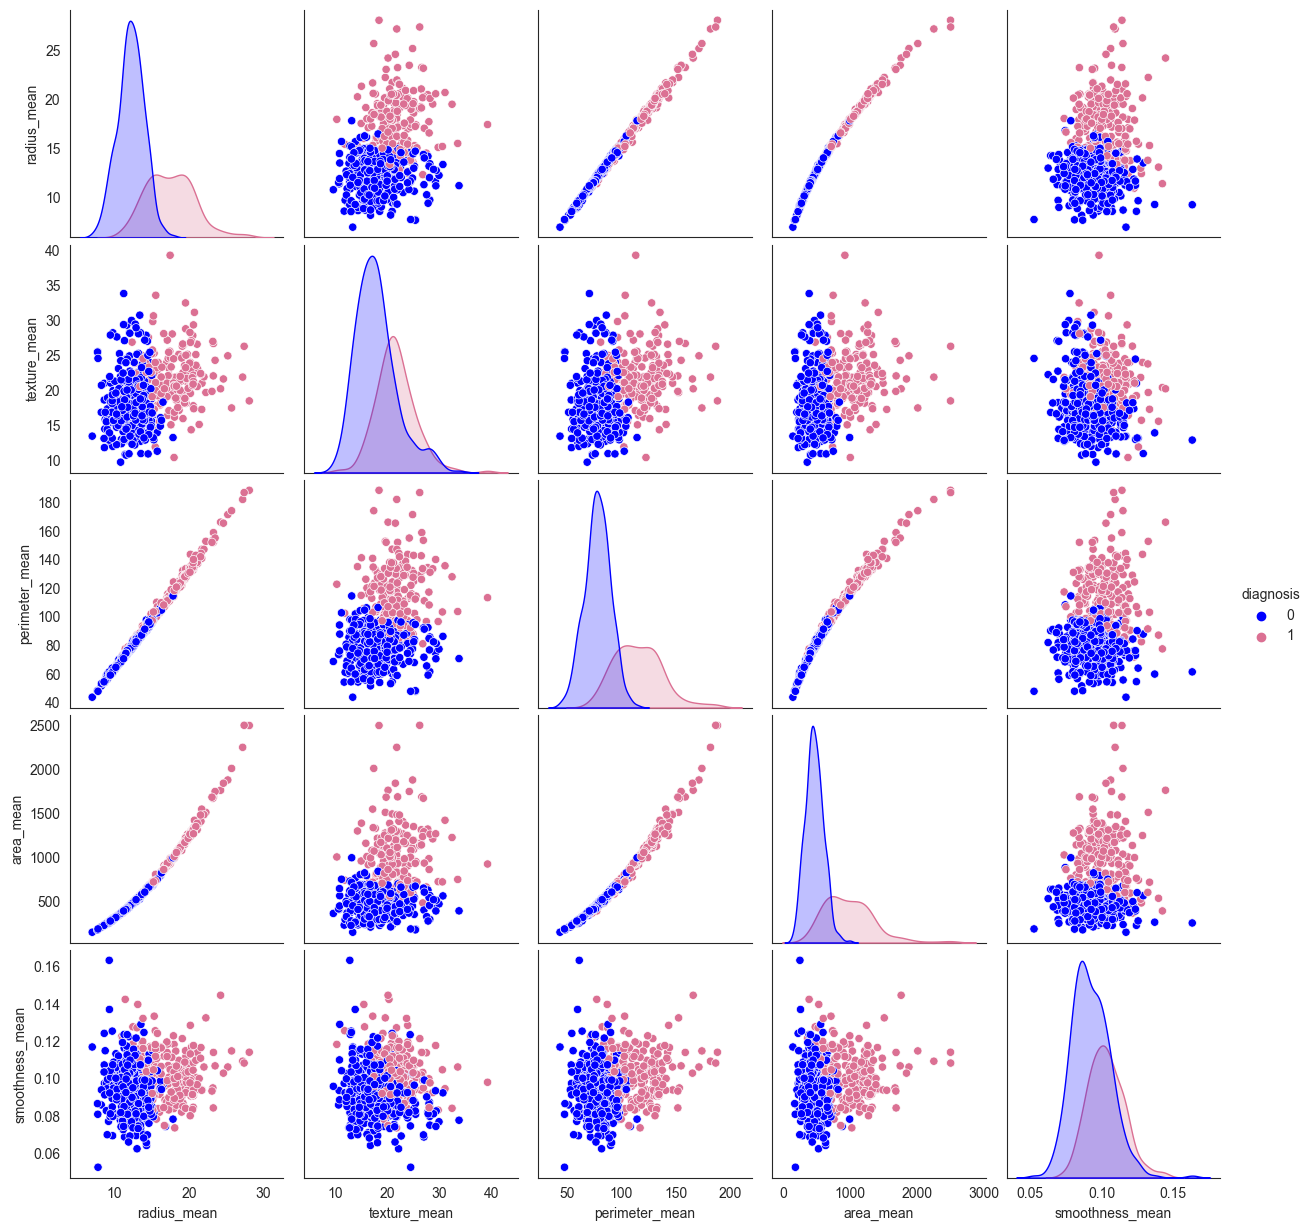

In [18]:
sns.pairplot(df, hue="diagnosis", vars=["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean"], palette=["blue", "palevioletred"])
plt.show()

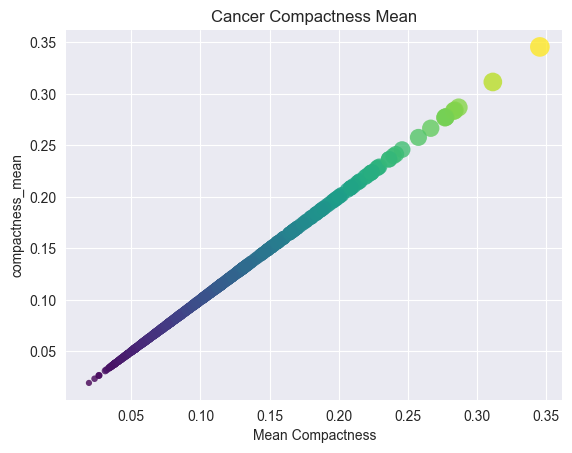

In [19]:
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="compactness_mean", y="compactness_mean", size="compactness_mean",
hue="compactness_mean", sizes=(20, 200), palette="viridis",
alpha=0.8, edgecolor='none', linewidth=0, legend=False)
plt.xlabel("Mean Compactness")
plt.title("Cancer Compactness Mean")
sns.despine(left=True, bottom=True)
plt.show()


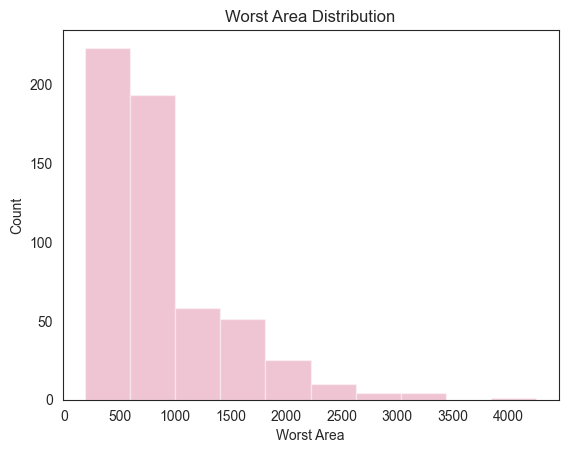

In [20]:
import seaborn as sns

# Set the style
sns.set_style("white")

# Create the histogram
sns.distplot(df["area_worst"], kde=False, bins=10, color='palevioletred')

# Set the axis labels
plt.xlabel("Worst Area")
plt.ylabel("Count")

# Set the title
plt.title("Worst Area Distribution")

# Display the plot
plt.show()


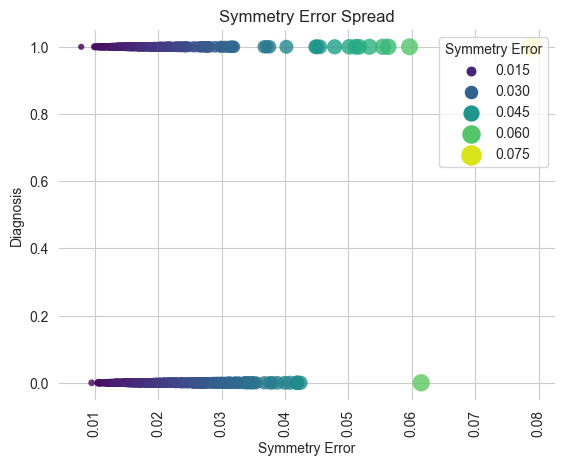

In [21]:
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='symmetry_se', y='diagnosis', hue='symmetry_se',
palette='viridis', size='symmetry_se', sizes=(20, 200),
alpha=0.8, edgecolor='none', linewidth=0)

sns.despine(left=True, bottom=True)

plt.title('Symmetry Error Spread')
plt.xlabel('Symmetry Error')
plt.ylabel('Diagnosis')
plt.xticks(rotation=90)
plt.legend(title='Symmetry Error', loc='upper right')

plt.show()







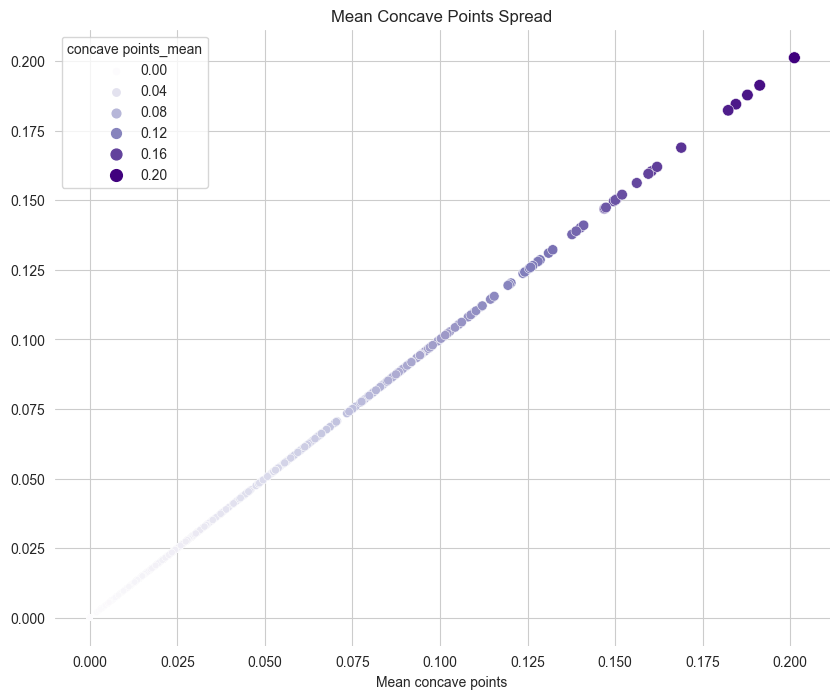

In [22]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="concave points_mean", y="concave points_mean", size="concave points_mean", hue="concave points_mean", palette="Purples")
sns.despine(left=True, bottom=True)

plt.title("Mean Concave Points Spread")
plt.xlabel("Mean concave points")
plt.ylabel("")
plt.show()

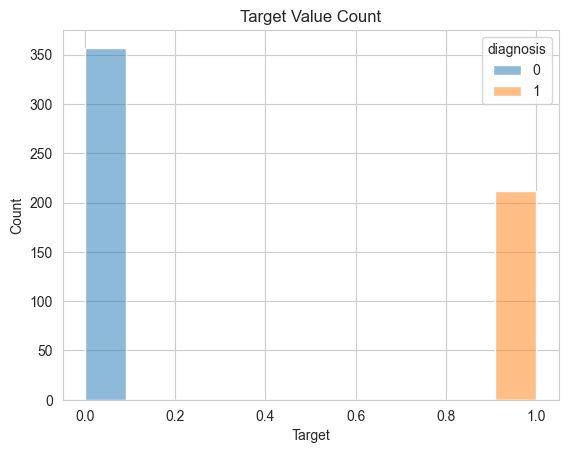

In [23]:
sns.histplot(data=df, x='diagnosis', hue='diagnosis', palette='tab10')
plt.title('Target Value Count')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

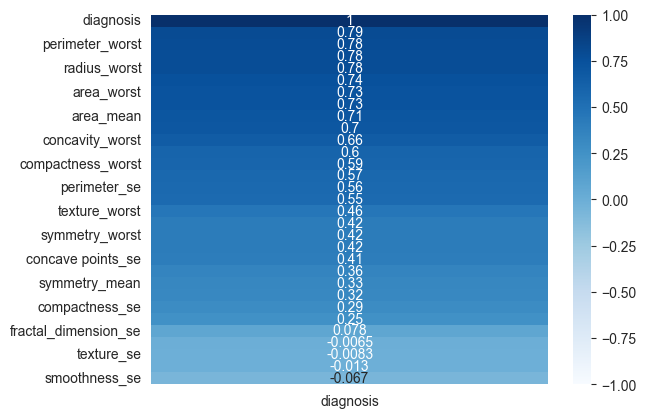

In [26]:
sns.heatmap(df.corr()[["diagnosis"]].sort_values(by="diagnosis", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

In [29]:
df.corr()[["diagnosis"]].sort_values(by="diagnosis", ascending=False)

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


<div style="background-color: pink; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Data Pre Processing</h1>
    
</div>

In [30]:
#Drop the target column from the X variable
X = df.drop(['diagnosis'], axis=1)

In [31]:
#Create Y variable with target column
y = df['diagnosis']

<div style="background-color: pink; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Feature Scaling</h1>
    
</div>

In [32]:
#At first we will do Feature Scaling to shrink our data values for better result
mms = MinMaxScaler()

scale = mms.fit_transform(X)

print(scale)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


<div style="background-color: pink; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Creating ML Model</h1>
    
</div>

In [33]:
#Split the dataset first before ML creating model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=1)

print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [34]:
# Defining the classifiers
classifiers = [
    LogisticRegression(),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(random_state = 40),
    RandomForestClassifier(random_state = 40, n_estimators = 100),
]

In [35]:
results=[]


for classifier in classifiers:
    # Train and predict using ADASYN resampled data
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Add results to list
    results.append({
        'Classifier': classifier.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

# Convert results list to pandas DataFrame
df_results = pd.DataFrame(results)

# Display results DataFrame
print(df_results)

               Classifier  Accuracy  Precision    Recall        F1
0      LogisticRegression  0.923977   0.890625  0.904762  0.897638
1                     SVC  0.853801   1.000000  0.603175  0.752475
2  DecisionTreeClassifier  0.912281   0.944444  0.809524  0.871795
3  RandomForestClassifier  0.947368   0.935484  0.920635  0.928000


<div style="background-color: pink; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Model Evaluation</h1>
    
</div>

In [40]:
#Evalute the result with Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[104,   4],
       [  5,  58]], dtype=int64)

<AxesSubplot: >

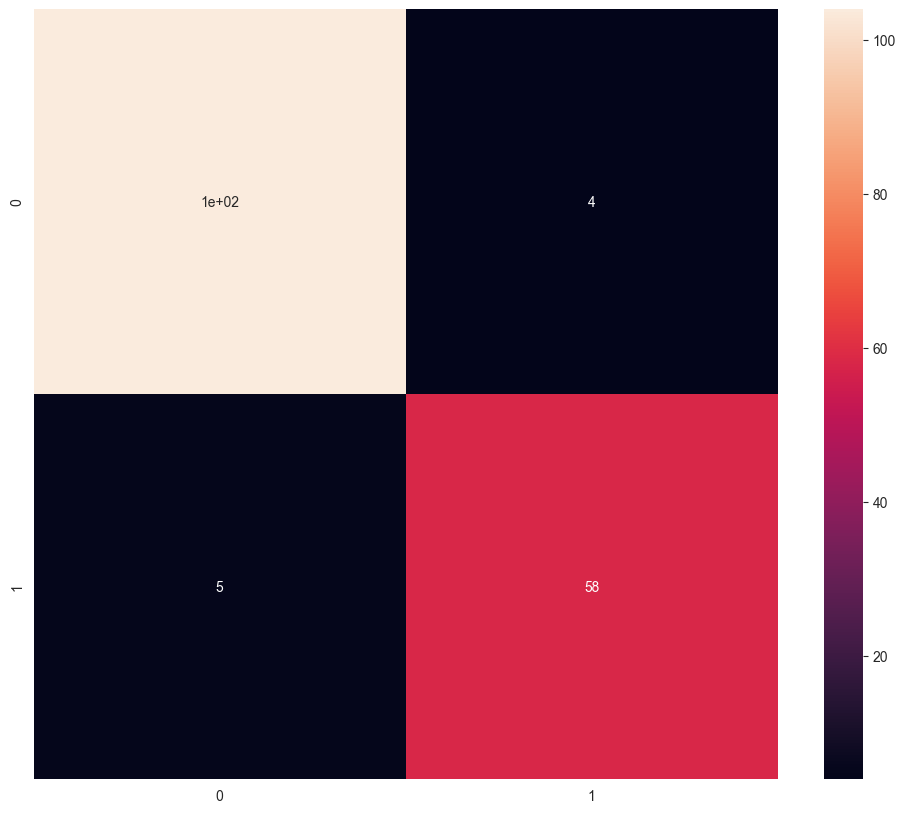

In [41]:
#Plot the Confusion Matrix result
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [42]:
#Separate the Confusion Matrix reuslt
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)
print('This is True Positive: ', tp)
print('This is True Negetive: ', tn)
print('This is False Positive: ', fp)
print('This is False Negetive: ', fn)

This is True Positive:  104
This is True Negetive:  58
This is False Positive:  5
This is False Negetive:  4


<div style="background-color: pink; padding: 10px; text-align: center;">
    
<h1 style="font-weight: bold; font-style: italic;">Conclusion</h1>
    
</div>

#### In this machine learning project using the breast cancer dataset, we developed and compared four different classifiers: Logistic Regression, Support Vector Machine (SVM), Decision Tree, and Random Forest.

#### After evaluating the performance of these classifiers using accuracy, precision, recall, and F1-score metrics, we found that Random Forest had the highest accuracy of 94.74% and also had good precision, recall, and F1-score values, indicating that it performed well in correctly identifying both malignant and benign tumors.

#### The confusion matrix shows that the model correctly classified 162 out of 171 samples (94.74%). Out of the 108 actual malignant samples, the model correctly identified 104 samples, and it correctly classified 58 out of the 62 actual benign samples. There were only nine misclassifications in total.

#### Overall, the results of this project indicate that machine learning algorithms can accurately classify breast cancer tumors as malignant or benign based on the features of the tumor. These models have the potential to aid medical professionals in making more accurate diagnoses and improving patient outcomes. The Random Forest classifier performed well in this project and can be used as a reliable model for classifying breast cancer tumors.